In [165]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
pd.options.display.max_columns = 30
import pandas as pd
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [166]:
training_data = pd.read_csv("2_training_testing_80/New_training_data_19Jan2021_r.csv",sep=',',header=0)
testing_data = pd.read_csv("2_training_testing_80/new_Test_data_19Jan.csv",sep=',',header=0)
len(training_data)

883

In [167]:
# For training Data
bins = [0,15,35,55,96]
labels=[0,1,2,3]
training_data['Age_bins'] = pd.cut(training_data['Age'], bins=bins, labels=labels, include_lowest=True)
print (training_data)

     Gender  Race  Ethnic Group    Encounter       Reason1       Reason2  \
0         1   0.0             1     57304086 -7.820000e-16  2.050000e-09   
1         0   0.0             0     59464001 -8.640000e-18  1.160000e-10   
2         1   1.0             0    306885119 -3.340000e-16  2.760000e-09   
3         1   1.0             0    843895334 -1.130000e-16  1.300000e-09   
4         0   1.0             0    964184337  5.560000e-17 -1.190000e-09   
..      ...   ...           ...          ...           ...           ...   
878       0   1.0             2  43280473142 -1.010000e-17 -4.370000e-12   
879       0   0.0             0  43600834323  1.000000e+00  1.450000e-15   
880       0   1.0             0  44604273292  3.800000e-17 -4.150000e-12   
881       0   0.0             0  46328314129  7.280000e-17 -1.850000e-11   
882       1   0.0             0  46642834260  1.000000e+00  1.450000e-15   

          Reason3       Reason4       Reason5       Reason6       Reason7  \
0    4.910

In [168]:
# For Testing Data
bins = [0,15,35,55,96]
labels=[0,1,2,3]
testing_data['Age_bins'] = pd.cut(testing_data['Age'], bins=bins, labels=labels, include_lowest=True)
print (testing_data)

    Gender  Race  Ethnic Group    Encounter       Reason1       Reason2  \
0        1     1             2    892774098  1.000000e+00  5.660000e-16   
1        0     1             2   1930374269  1.000000e+00  5.660000e-16   
2        0     0             0   4090293179  1.000000e+00  1.450000e-15   
3        0     0             2   5394323197  1.000000e+00  1.450000e-15   
4        1     1             0   5903325002  1.000000e+00  1.450000e-15   
..     ...   ...           ...          ...           ...           ...   
75       1     6             2  50979275303  1.000000e+00  1.450000e-15   
76       1     0             0  50998165297  1.000000e+00  5.660000e-16   
77       1     0             0  51043285325  1.450000e-16 -3.320000e-10   
78       1     0             0  51360305347  1.000000e+00  1.450000e-15   
79       0     0             0  51362525349  1.000000e+00  1.450000e-15   

         Reason3       Reason4       Reason5       Reason6       Reason7  \
0   2.060000e-16 -9.200

In [169]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

training_data = clean_dataset(training_data)
testing_data = clean_dataset(testing_data)
print (training_data)

     Gender  Race  Ethnic Group     Encounter       Reason1       Reason2  \
0       1.0   0.0           1.0  5.730409e+07 -7.820000e-16  2.050000e-09   
1       0.0   0.0           0.0  5.946400e+07 -8.640000e-18  1.160000e-10   
2       1.0   1.0           0.0  3.068851e+08 -3.340000e-16  2.760000e-09   
3       1.0   1.0           0.0  8.438953e+08 -1.130000e-16  1.300000e-09   
4       0.0   1.0           0.0  9.641843e+08  5.560000e-17 -1.190000e-09   
..      ...   ...           ...           ...           ...           ...   
878     0.0   1.0           2.0  4.328047e+10 -1.010000e-17 -4.370000e-12   
879     0.0   0.0           0.0  4.360083e+10  1.000000e+00  1.450000e-15   
880     0.0   1.0           0.0  4.460427e+10  3.800000e-17 -4.150000e-12   
881     0.0   0.0           0.0  4.632831e+10  7.280000e-17 -1.850000e-11   
882     1.0   0.0           0.0  4.664283e+10  1.000000e+00  1.450000e-15   

          Reason3       Reason4       Reason5       Reason6       Reason7  

In [170]:
# Save fresh "training_data" and "testing_data" data after cleaning
#training_data.to_csv("3_cleaned_training_testing_data_after_scoring/training_data.csv")
#testing_data.to_csv("3_cleaned_training_testing_data_after_scoring/testing_data.csv")

In [171]:
X_train = training_data[['Gender','Race','Ethnic Group','Age_bins', 'Reason1','Reason2','Reason3','Reason4','Reason5','Reason6',
        'Reason7','Reason8','Reason9','Reason10','Reason11','Reason12', 'Reason13','Reason14','Reason15','Reason16',
         'Reason17','Reason18', 'Reason19','Reason20']]
#X_train = training_data[['Gender','Race','Ethnic Group','Age_bins']]
y_train = training_data['Class']
X_test = testing_data[['Gender','Race','Ethnic Group','Age_bins', 'Reason1','Reason2','Reason3','Reason4','Reason5','Reason6',
        'Reason7','Reason8','Reason9','Reason10','Reason11','Reason12', 'Reason13','Reason14','Reason15','Reason16',
         'Reason17','Reason18', 'Reason19','Reason20']]
#X_test = testing_data[['Gender','Race','Ethnic Group','Age_bins']]
y_test = testing_data['Class']

In [172]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=30, random_state=391),
    LinearSVC(),
    LogisticRegression(random_state=45)]

# 10 fold Cross-validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Ver

In [173]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.521591,0.050947
LogisticRegression,0.528409,0.052281
RandomForestClassifier,0.754545,0.062975


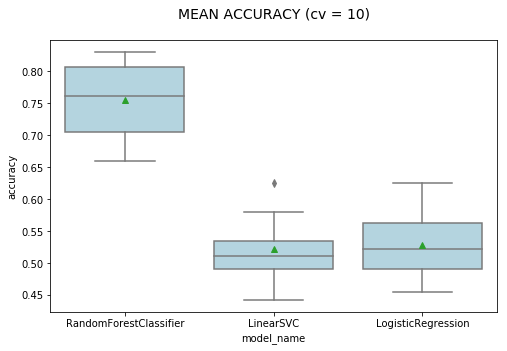

In [174]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 10)\n", size=14);

In [175]:
# Save raw results Box Plot
cv_df.to_csv("Box_plot/Sensor_data_demographic_comorbidity_box_plot.csv")

In [176]:
#model = LinearSVC()
#model = LogisticRegression(random_state=45)
model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])

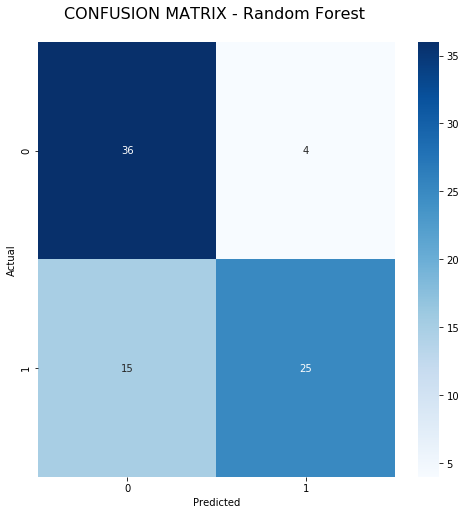

In [177]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.title("CONFUSION MATRIX - Logistic Regression\n", size=16);
plt.title("CONFUSION MATRIX - Random Forest \n", size=16);

In [178]:
# Save raw results Confusion Matrix
conf_scores_csv = pd.DataFrame({"y_test" : y_test, "y_pred" : y_pred})
conf_scores_csv.to_csv("Confusion_matrix/Sensor_data_classification_demographic_comorbidity.csv", index=False)

In [179]:
from sklearn.metrics import classification_report
target_names = ['Sepsis', 'NonSepsis']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Sepsis       0.71      0.90      0.79        40
   NonSepsis       0.86      0.62      0.72        40

    accuracy                           0.76        80
   macro avg       0.78      0.76      0.76        80
weighted avg       0.78      0.76      0.76        80



In [180]:
# For Random Forest and Logistoc Regression
Pred_score = model.predict_proba(X_train)
len(Pred_score)
res = pd.DataFrame(Pred_score)
res.index = X_train.index # its important for comparison
res.columns = ["Sepsis","Non-Sepsis"]
res.to_csv("Sensor_data_Train_scores_demographic_comorbidity.csv")
#res.to_csv("lateFusion_results_4hr_36000samples_1Dec.csv")

In [181]:
# For Random Forest and Logistoc Regression
Pred_score = model.predict_proba(X_test)
len(Pred_score)
res = pd.DataFrame(Pred_score)
res.index = X_test.index # its important for comparison
res.columns = ["Sepsis","Non-Sepsis"]
res.to_csv("Sensor_data_Test_scores_demographic_comorbidity.csv")
#res.to_csv("lateFusion_results_4hr_36000samples_1Dec.csv")

In [223]:
#For Linear SVC
from sklearn import svm
clf=svm.LinearSVC()
clf.fit(X_train, y_train)
Pred_score= clf._predict_proba_lr(X_test)
print(len(Pred_score))
res = pd.DataFrame(Pred_score)
res.index = X_test.index # its important for comparison
res.columns = ["Sepsis_monjoy","Non-Sepsis_monjoy"]
res.to_csv("lateFusion_results_6hr_17Dec.csv")
#res.to_csv("lateFusion_results_4hr_9000samples_1Dec.csv")

80
